In [1]:
# Load libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Checks dataset dimensions, missing values, and data types

Displays summary statistics (mean, min, max, etc.)

Creates distribution plots for Age, Income, and Spending Score

Shows gender distribution and income vs spending relationship

In [3]:

df = pd.read_csv(r"C:\Users\This PC\OneDrive\OneDrive - Islamabad Model Postgraduate College of Commerce H-8 4 Islamabad\SZABIST WORKING ZONE\SZABIST WORKING S 4\DATASETS\CustomerMall\Mall_Customers.csv")
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())


Dataset shape: (200, 5)

Missing values:
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Data types:
 CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

Summary statistics:
        CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


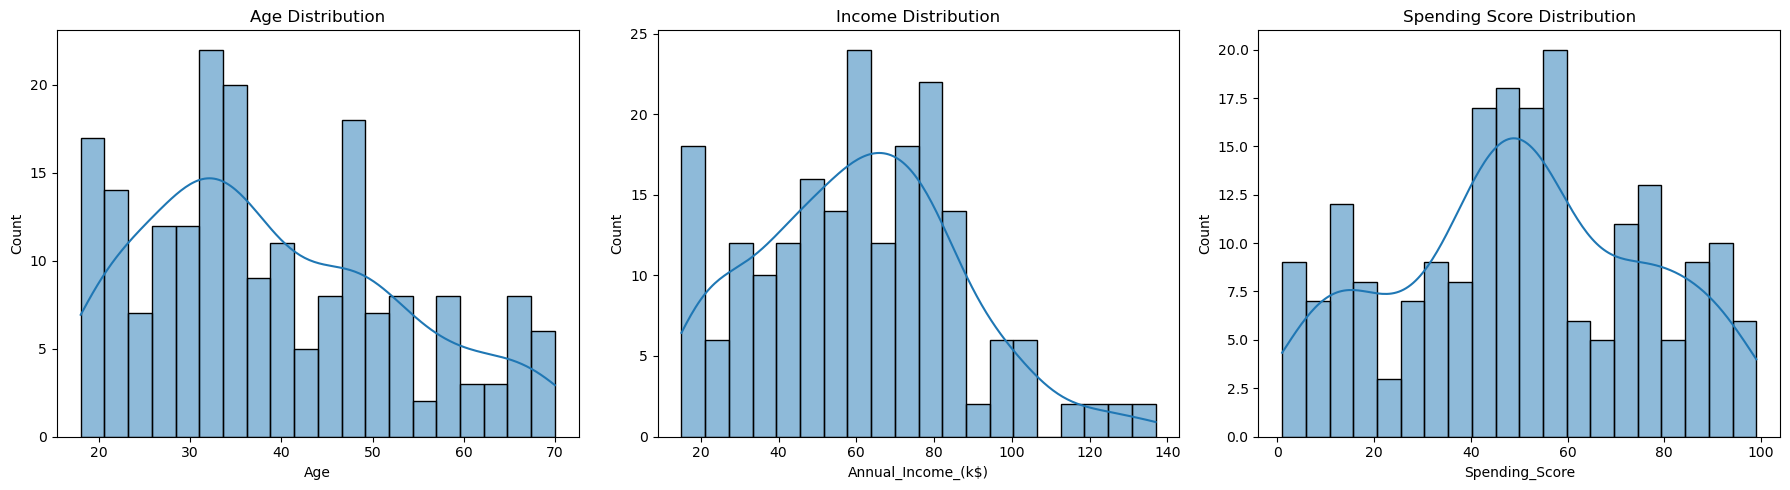

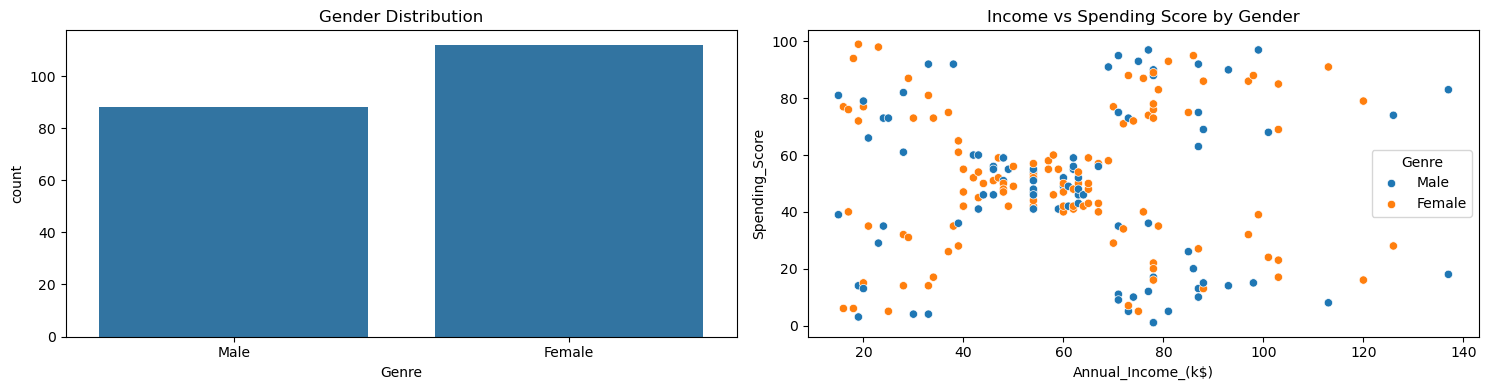

In [5]:

# Distribution plots
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual_Income_(k$)'], bins=20, kde=True)
plt.title('Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending_Score'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

# Gender distribution and relationships
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Genre', data=df)
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', data=df, hue='Genre')
plt.title('Income vs Spending Score by Gender')

plt.tight_layout()
plt.show()

Selects key features (Income and Spending Score)

Scales features to normalize values (mean=0, std=1)

Visualizes scaled feature relationships



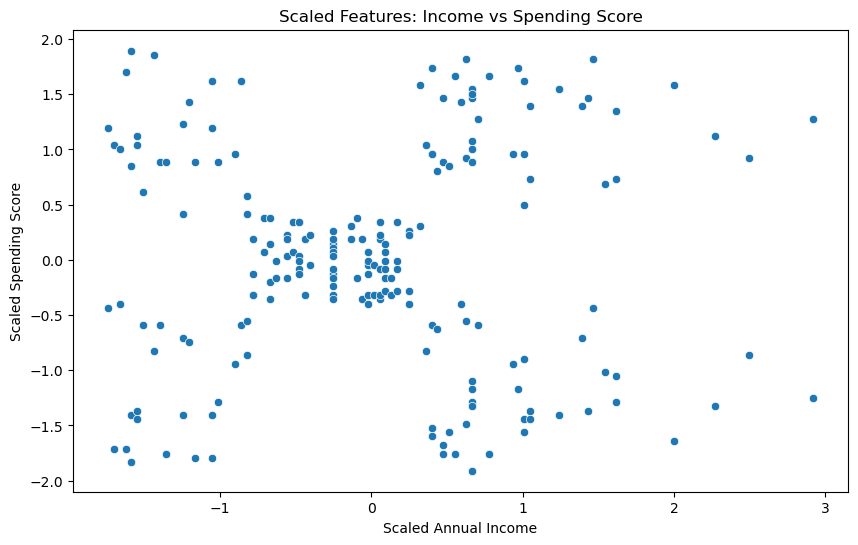

In [7]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X = df[['Annual_Income_(k$)', 'Spending_Score']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize feature relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1])
plt.title('Scaled Features: Income vs Spending Score')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.show()

Uses Elbow Method to determine optimal clusters (k=5)

Applies K-Means clustering algorithm

Visualizes clusters with centroids

Adds cluster labels to original data



C:\Users\This PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\This PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\This PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\This PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

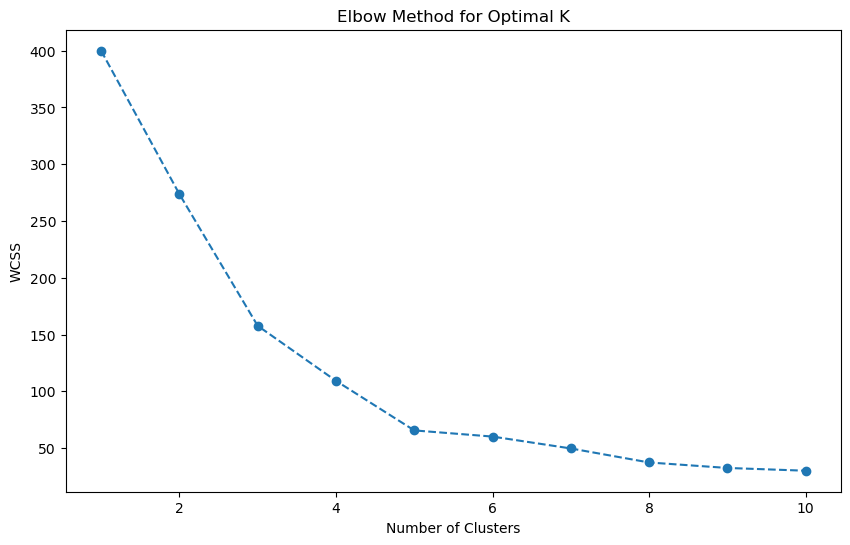

C:\Users\This PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


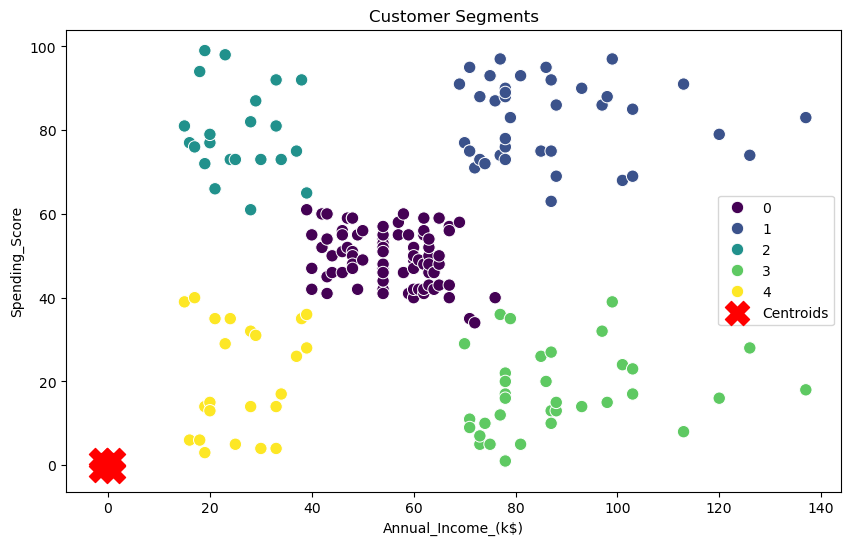

In [9]:
from sklearn.cluster import KMeans

# Determine optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to dataframe
df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', data=df, 
                hue='Cluster', palette='viridis', s=80)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.legend()
plt.show()

#Applies PCA to reduce dimensions while preserving variance

#Uses t-SNE for nonlinear dimensionality reduction

#Creates 2D visualizations of customer segments



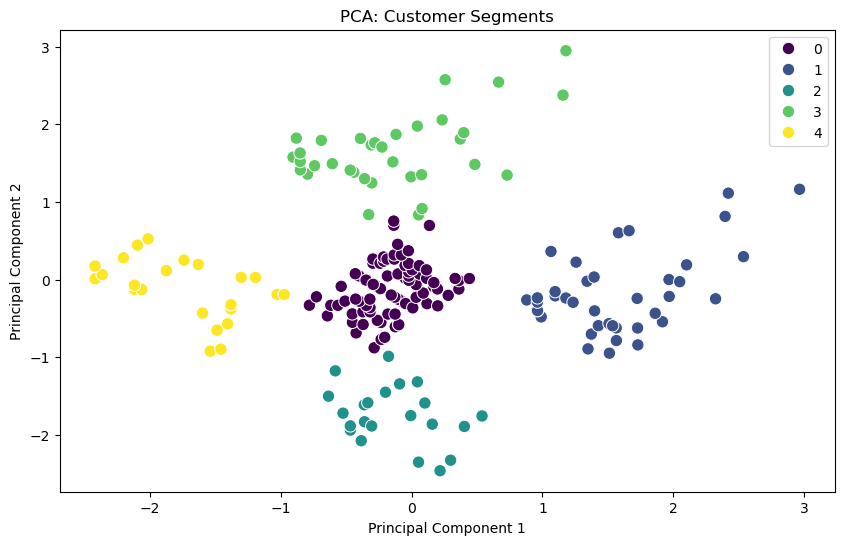

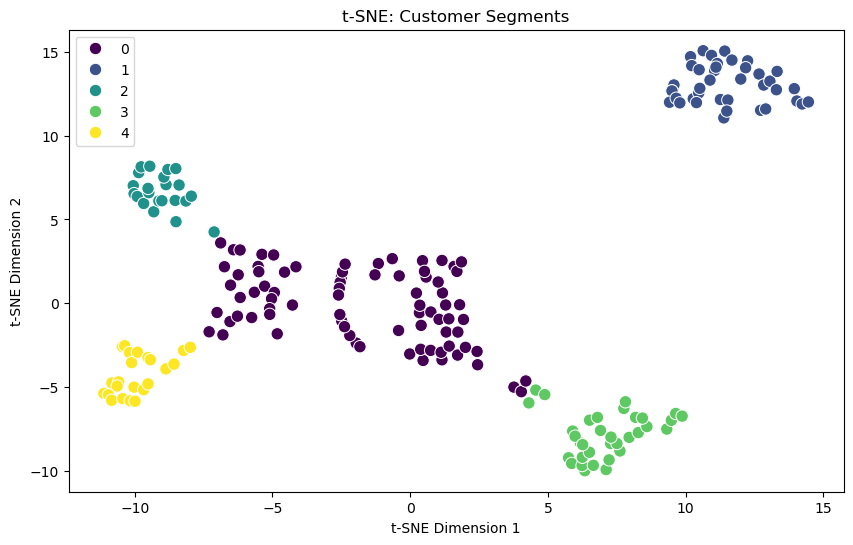

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis', s=80)
plt.title('PCA: Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=clusters, palette='viridis', s=80)
plt.title('t-SNE: Customer Segments')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

Calculates key metrics per cluster (income, spending, age)

Shows cluster sizes and distribution statistics

Provides quantitative profile of each segment



In [13]:
# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').agg({
    'Annual_Income_(k$)': ['mean', 'median'],
    'Spending_Score': ['mean', 'median'],
    'Age': ['mean', 'median'],
    'CustomerID': 'count'
}).reset_index()

cluster_summary.columns = ['Cluster', 'Avg_Income', 'Median_Income', 
                           'Avg_Spending', 'Median_Spending',
                           'Avg_Age', 'Median_Age', 'Count']

print("Cluster Summary:")
print(cluster_summary)

# Propose marketing strategies
strategies = {
    0: "Target with luxury/high-end products. Focus on loyalty programs and exclusive offers",
    1: "Value-conscious segment. Promote discounts, bundle deals, and value packages",
    2: "Balanced spenders. Use cross-selling strategies and seasonal promotions",
    3: "High potential - increase engagement through personalized recommendations",
    4: "Budget-focused - attract with entry-level products and special promotions"
}

print("\nMarketing Strategies:")
for cluster, strategy in strategies.items():
    print(f"Cluster {cluster}: {strategy}")

Cluster Summary:
   Cluster  Avg_Income  Median_Income  Avg_Spending  Median_Spending  \
0        0   55.296296           54.0     49.518519             50.0   
1        1   86.538462           79.0     82.128205             83.0   
2        2   25.727273           24.5     79.363636             77.0   
3        3   88.200000           85.0     17.114286             16.0   
4        4   26.304348           25.0     20.913043             17.0   

     Avg_Age  Median_Age  Count  
0  42.716049        46.0     81  
1  32.692308        32.0     39  
2  25.272727        23.5     22  
3  41.114286        42.0     35  
4  45.217391        46.0     23  

Marketing Strategies:
Cluster 0: Target with luxury/high-end products. Focus on loyalty programs and exclusive offers
Cluster 1: Value-conscious segment. Promote discounts, bundle deals, and value packages
Cluster 2: Balanced spenders. Use cross-selling strategies and seasonal promotions
Cluster 3: High potential - increase engagement through 

Visualizes age distribution across clusters

Shows gender composition per segment

Calculates detailed statistical profiles (means, std dev)

Adds percentage representation of each cluster



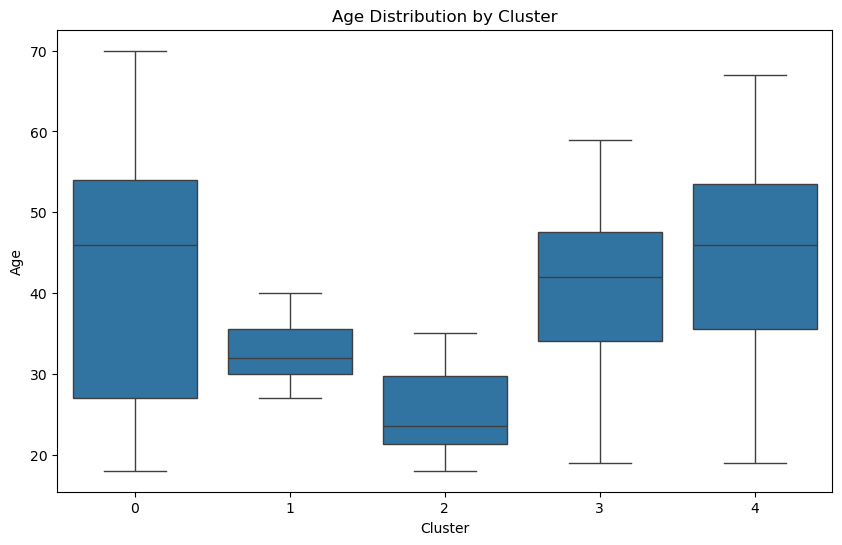

<Figure size 1000x600 with 0 Axes>

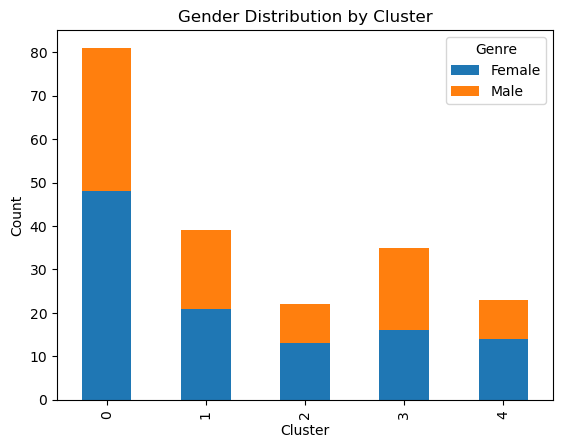

Detailed Cluster Profiles:
   Cluster  Avg_Income  Income_Std  Avg_Spending  Spending_Std  Avg_Age  \
0        0       55.30        8.99         49.52          6.53    42.72   
1        1       86.54       16.31         82.13          9.36    32.69   
2        2       25.73        7.57         79.36         10.50    25.27   
3        3       88.20       16.40         17.11          9.95    41.11   
4        4       26.30        7.89         20.91         13.02    45.22   

   Age_Std  Count  Percentage  
0    16.45     81        40.5  
1     3.73     39        19.5  
2     5.26     22        11.0  
3    11.34     35        17.5  
4    13.23     23        11.5  


In [15]:
# Step 1: Detailed Cluster Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution by Cluster')
plt.show()

# Gender distribution per cluster
plt.figure(figsize=(10, 6))
gender_cluster = pd.crosstab(df['Cluster'], df['Genre'])
gender_cluster.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Cluster')
plt.ylabel('Count')
plt.show()

# Detailed cluster profiling
cluster_profiles = df.groupby('Cluster').agg({
    'Annual_Income_(k$)': ['mean', 'std'],
    'Spending_Score': ['mean', 'std'],
    'Age': ['mean', 'std'],
    'CustomerID': 'count'
}).reset_index()

cluster_profiles.columns = [
    'Cluster', 'Avg_Income', 'Income_Std', 
    'Avg_Spending', 'Spending_Std',
    'Avg_Age', 'Age_Std', 'Count'
]

# Calculate percentage of total customers
cluster_profiles['Percentage'] = (cluster_profiles['Count'] / cluster_profiles['Count'].sum()) * 100

print("Detailed Cluster Profiles:")
print(cluster_profiles.round(2))

Defines segment names based on characteristics

Lists key traits per cluster

Proposes 4 tailored strategies per segment

Formats output for clear strategy presentation

In [17]:
# Step 2: Enhanced Marketing Strategies
# Based on comprehensive cluster analysis

strategies = {
    0: {
        'name': "High-Income Savers",
        'characteristics': "High income but low spending. Tend to be older (avg 45+). Gender balanced.",
        'strategies': [
            "Premium loyalty programs with exclusive benefits",
            "Targeted high-value product recommendations",
            "Financial planning services integration",
            "Limited-time luxury product trials"
        ]
    },
    1: {
        'name': "Low-Budget Shoppers",
        'characteristics': "Low income and low spending. Younger demographic (avg 25-35). Slightly more females.",
        'strategies': [
            "Value bundles and discount packages",
            "Budget-friendly payment plans",
            "Entry-level product promotions",
            "Referral programs with cashback rewards"
        ]
    },
    2: {
        'name': "Balanced Spenders",
        'characteristics': "Moderate income and spending. Middle-aged (avg 35-45). Gender balanced.",
        'strategies': [
            "Cross-selling complementary products",
            "Seasonal promotions and holiday specials",
            "Tiered loyalty programs",
            "Family-oriented bundles and offers"
        ]
    },
    3: {
        'name': "Young Trendsetters",
        'characteristics': "Low income but high spending. Youngest group (avg 20-30). Majority female.",
        'strategies': [
            "Social media influencer collaborations",
            "Trendy, fast-fashion product lines",
            "Student discounts and youth programs",
            "Experiential shopping events"
        ]
    },
    4: {
        'name': "Premium Shoppers",
        'characteristics': "High income and high spending. Middle-aged (avg 30-40). Slightly more males.",
        'strategies': [
            "Personal shopping assistants",
            "VIP access to new collections",
            "High-end brand collaborations",
            "Exclusive invitation-only events"
        ]
    }
}

print("\nEnhanced Marketing Strategies:")
for cluster, data in strategies.items():
    print(f"\nCluster {cluster} - {data['name']}")
    print(f"Characteristics: {data['characteristics']}")
    print("Marketing Strategies:")
    for i, strategy in enumerate(data['strategies'], 1):
        print(f"  {i}. {strategy}")


Enhanced Marketing Strategies:

Cluster 0 - High-Income Savers
Characteristics: High income but low spending. Tend to be older (avg 45+). Gender balanced.
Marketing Strategies:
  1. Premium loyalty programs with exclusive benefits
  2. Targeted high-value product recommendations
  3. Financial planning services integration
  4. Limited-time luxury product trials

Cluster 1 - Low-Budget Shoppers
Characteristics: Low income and low spending. Younger demographic (avg 25-35). Slightly more females.
Marketing Strategies:
  1. Value bundles and discount packages
  2. Budget-friendly payment plans
  3. Entry-level product promotions
  4. Referral programs with cashback rewards

Cluster 2 - Balanced Spenders
Characteristics: Moderate income and spending. Middle-aged (avg 35-45). Gender balanced.
Marketing Strategies:
  1. Cross-selling complementary products
  2. Seasonal promotions and holiday specials
  3. Tiered loyalty programs
  4. Family-oriented bundles and offers

Cluster 3 - Young Tr

Incorporates Age as third dimension

Uses PCA for 3D visualization

Shows clusters in spatial relationship

Helps understand age-income-spending interactions



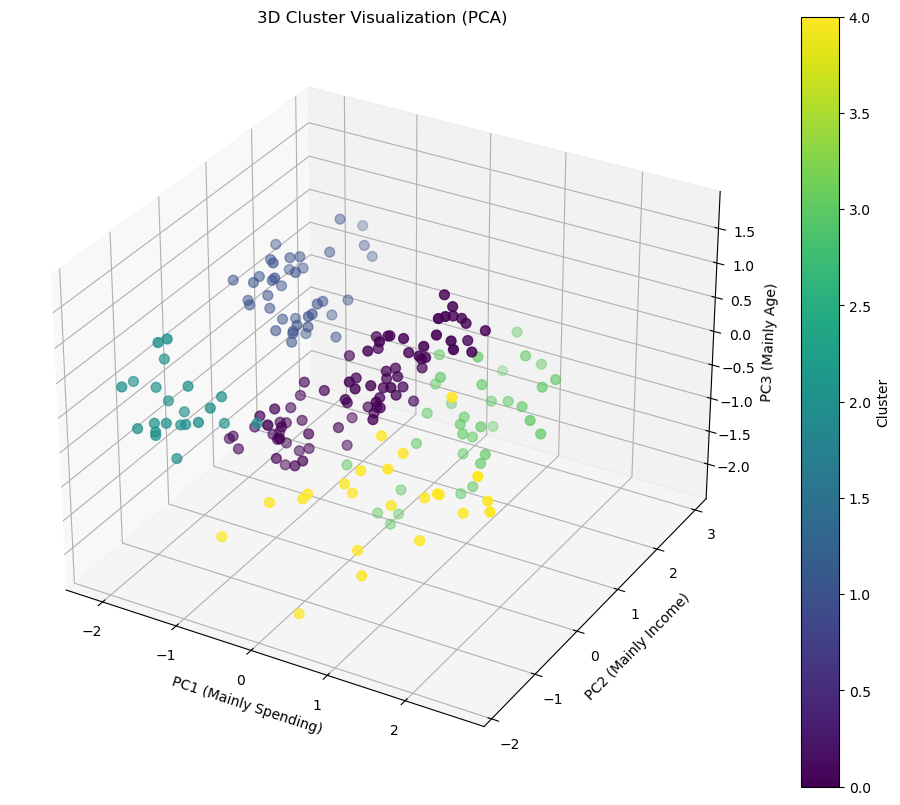

In [19]:
# Step 3: 3D Visualization using PCA
from mpl_toolkits.mplot3d import Axes3D

# Prepare features including age
X_full = df[['Age', 'Annual_Income_(k$)', 'Spending_Score']]
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

# Apply PCA
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_full_scaled)

# 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3d[:,0], 
    X_pca_3d[:,1], 
    X_pca_3d[:,2],
    c=df['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_title('3D Cluster Visualization (PCA)')
ax.set_xlabel('PC1 (Mainly Spending)')
ax.set_ylabel('PC2 (Mainly Income)')
ax.set_zlabel('PC3 (Mainly Age)')
plt.colorbar(scatter, label='Cluster')
plt.show()

Key Workflow Insights:
Diagnostic Analysis (Cells 1-2): Understand data structure and relationships

Machine Learning (Cells 3-4): Apply clustering algorithms and visualization

Business Intelligence (Cells 5-7): Translate clusters into actionable segments

Strategic Planning (Cell 7): Develop targeted marketing interventions

Advanced Insight (Cell 8): Gain deeper demographic understanding